# Part 1: BST Traversal

## Problem 1

In [1]:
from TreeTraversal import BinaryTree, DFSTraversal, DFSTraversalTypes

# fill in the tree
input_array = [3, 9, 2, 11]
bt = BinaryTree()
for val in input_array:
    bt.insert(val)

# demo
traversal = DFSTraversal(bt, DFSTraversalTypes.INORDER)
print('INORDER', [node.val for node in traversal])
traversal.changeTraversalType(DFSTraversalTypes.PREORDER)
print('PREORDER', [node.val for node in traversal])
traversal.changeTraversalType(DFSTraversalTypes.POSTORDER)
print('POSTORDER', [node.val for node in traversal])

INORDER [2, 3, 9, 11]
PREORDER [3, 2, 9, 11]
POSTORDER [2, 11, 9, 3]


# Part 2: Iterators

## Problem 1:

In [2]:
import numpy as np
import random

class Markov:
    def __init__(self, first_day):
        self.data = None # will hold weather array
        self.previous_day = first_day # starting weather type
        # possible weather types
        self.weather = {
            'sunny': 0,
            'cloudy': 1,
            'rainy': 2,
            'snowy': 3,
            'windy': 4,
            'hailing': 5
        }

    # load weather array
    def load_data(self, array):
        self.data = array
        
    # returns appropriate weather probability from weather table
    def get_prob(self, previous_day, following_day):
        before_idx = self.weather[previous_day]
        after_idx = self.weather[following_day]

        try:
            prob = self.data[before_idx][after_idx]
            return prob
        except TypeError: # catch if no data file loaded
            error_msg = 'please load data file first with load_data method'
            return error_msg
        
    # steps through markov chain given number of days to step
    def get_weather_for_day(self, day):
        for i in range(day):
            # predict next day's weather using current day's
            self.previous_day = next(self)
        return(next(self))

    # first part of iterator object
    def __iter__(self):
        return self

    # second part of iterator object
    def __next__(self): 
        try:
            # translate weather string to proper idx in weather array
            previous_weather_idx = self.weather[self.previous_day]
            
            # get corresponding row from weather array
            next_day_probs = self.data[previous_weather_idx]
            
            # get weather name strings
            #weather_types = list(self.weather.keys())
            weather_types = [*self.weather]
            
            # stocastically select next weather type based on 
            # probabilities from specified weather array row
            next_day = np.random.choice(weather_types, p=next_day_probs)
            return next_day
        
        # terminate iterator after last day has been reached
        except IndentationError:
            raise StopIteration

### Quick check

Text(0, 0.5, 'count')

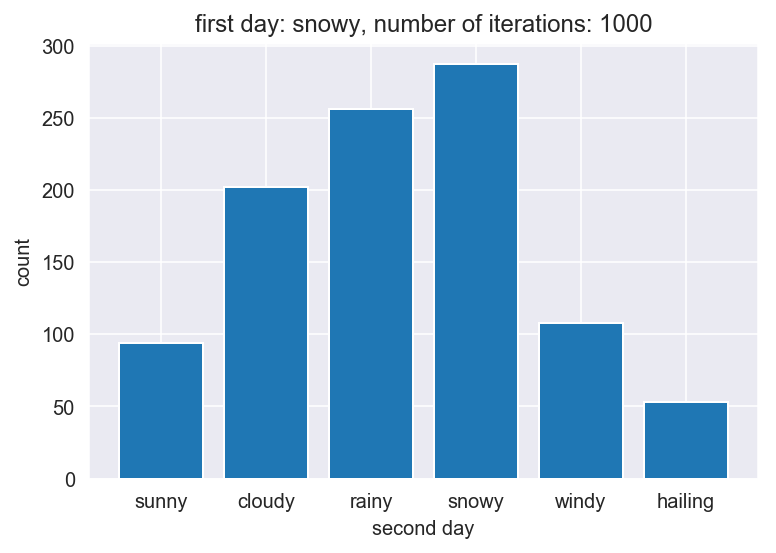

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import collections

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'

weather = np.genfromtxt('weather.csv', delimiter=',')
first_day = 'snowy'
x = Markov(first_day)
x.load_data(weather)

num_iter = 1000
weather_outcomes = []
for i in range(num_iter):
    weather_outcomes.append(next(x))
    
weather_freq = collections.Counter(weather_outcomes)

weather_name_sorted = x.weather.keys()
weather_count_sorted = []
for weather_name in weather_name_sorted:
    weather_count_sorted.append(weather_freq[weather_name])
    
plt.bar(weather_name_sorted, weather_count_sorted)
plt.title(f'first day: {first_day}, number of iterations: {num_iter}')
plt.xlabel('second day')
plt.ylabel('count')

Cool, this checks out with the relative probabilities from the weather data table. Changing `first day` to any of the other weather types seems to also gel with their relevant row in the weather table.

## Problem 2

Added `get_weather_for_day` method to `Markov` class in Problem 1

In [6]:
city_weather = {
    'New York': 'rainy',
    'Chicago': 'snowy',
    'Seattle': 'rainy',
    'Boston': 'hailing',
    'Miami': 'windy',
    'Los Angeles': 'cloudy',
    'San Fransisco': 'windy'
}

city_weather_predictions = {} # final summary statistics
for city, first_day in city_weather.items():
    x = Markov(first_day)
    x.load_data(weather)

    # run 100 simulations for each city
    future_weather = []
    for i in range(100):
        future = x.get_weather_for_day(7)
        future_weather.append(future)

    # check for duplicates in most common weather and display
    weather_freq = collections.Counter(future_weather)
    m = max(weather_freq.values())
    common = [weather for weather in weather_freq if weather_freq[weather] == m]
    
    # print stats, with weather outcomes ordered from most to least likely
    preds = dict(sorted(weather_freq.items(), key=lambda x: x[1], reverse=True))
    print(f'{city}\n---------')
    print(f'most common weather prediction: {common}')
    print(f'Number of predictions: {preds}\n')
    
    city_weather_predictions[city] = common
    
print('final stats\n---------')
# display final dictionary of cities
print(city_weather_predictions)

New York
---------
most common weather prediction: ['sunny']
Number of predictions: {'sunny': 27, 'cloudy': 23, 'rainy': 20, 'windy': 13, 'snowy': 9, 'hailing': 8}

Chicago
---------
most common weather prediction: ['cloudy']
Number of predictions: {'cloudy': 32, 'sunny': 25, 'rainy': 17, 'snowy': 13, 'hailing': 9, 'windy': 4}

Seattle
---------
most common weather prediction: ['cloudy']
Number of predictions: {'cloudy': 28, 'sunny': 23, 'rainy': 20, 'snowy': 12, 'windy': 11, 'hailing': 6}

Boston
---------
most common weather prediction: ['sunny']
Number of predictions: {'sunny': 35, 'cloudy': 27, 'rainy': 17, 'snowy': 8, 'hailing': 7, 'windy': 6}

Miami
---------
most common weather prediction: ['cloudy']
Number of predictions: {'cloudy': 36, 'sunny': 28, 'rainy': 12, 'snowy': 11, 'windy': 7, 'hailing': 6}

Los Angeles
---------
most common weather prediction: ['cloudy']
Number of predictions: {'cloudy': 33, 'sunny': 27, 'rainy': 18, 'windy': 9, 'snowy': 9, 'hailing': 4}

San Fransis

In this run, SF happened to have equal probability of ending up as sunny or cloudy after 7 days, so both are saved. I am interpretting this as SF being partly sunny, partly cloudy.